
Highest number of likes in a tweet : 41
Average number of likes in all the tweets : 0.26570048309178745
Highest number of retweets in a tweet: 3861
Average number of retweets in all the tweets : 130.95169082125605

 Creation of content sources:
*Twitter for iPad 5.314009661835748%
*Twitter for Android 38.64734299516908%
*CtrlSec 2.657004830917874%
*Twitter Web Client 23.91304347826087%
*Twitter for iPhone 21.497584541062803%
*Twitter Lite 5.314009661835748%
*TweetDeck 1.2077294685990339%
*Hootsuite 0.24154589371980675%
*Al Masdar News 0.24154589371980675%
*Mobile Web (M2) 0.24154589371980675%
*IFTTT 0.24154589371980675%
*Twitter for BlackBerry 0.24154589371980675%
*Digitera ReTweet 0.24154589371980675%


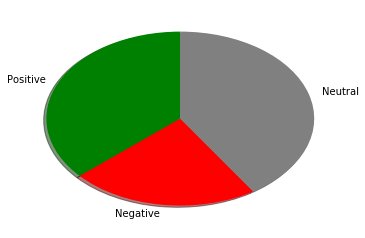

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import csv

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Twitter credentials
CONSUMER_KEY = 'fS8XQi8JmohDvSCEfnIxXeXvR'
CONSUMER_SECRET = '9JMmMHmwR9LxILIQp1saWk0OLqe1Q9GvTh1ouwcDFBWf2axb8o'
ACCESS_TOKEN = '2433689125-R31DceVfSshRAGWUbQKpaHVadZ1xOrWMPUBD8BJ'
ACCESS_SECRET = 'wcj6ceEscjCjeaSLXA4xZFqaHzuFCZ8ZG1rctXhIPeiuC'

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
# Return API with authentication:
api = tweepy.API(auth,wait_on_rate_limit=True)


# Query
subject = input('Enter subject of interest: ')
number = input('Enter number of tweets: ')

# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
#tweets = extractor.user_timeline(screen_name=str(subject), count=number)  #used for a specific user
tweets = []
for tweet in tweepy.Cursor(api.search, q='%23'+str(subject),since='2018-01-01',lang='en').items(int(number)):  # used for a specific hashtag
    tweets.append(tweet)

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We add relevant data:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

from datetime import datetime
data["time"] = [d.time() for d in data["Date"]]

# We extract the tweet with more FAVs and more Retweet:

like_max = np.max(data['Likes'])
like_mean = np.mean(data['Likes'])

rt_max  = np.max(data['RTs'])
rt_mean = np.mean(data['RTs'])

# Max FAVs:
print("\nHighest number of likes in a tweet : {}".format(like_max))
print("Average number of likes in all the tweets : {}".format(like_mean))

# Max RTs:
print("Highest number of retweets in a tweet: {}".format(rt_max))
print("Average number of retweets in all the tweets : {}".format(rt_mean))

# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We create a numpy vector mapped to labels:
count = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            count[index] += 1
            pass
        
count /= len(data['Source'])

# We print sources list:
i=0
print("\n Creation of content sources:")
for i in range(len(count)):
    print("*" + sources[i] + " " + str(count[i]*100) + "%")
    i+=1
    
    
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"
    

# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
    
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == "positive"]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == "neutral"]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == "negative"]

## declare the variables for the pie chart, using the Counter variables for "sizes"
colors = ['green', 'red', 'grey']
sizes = [len(pos_tweets), len(neg_tweets), len(neu_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

## use matplotlib to plot the chart

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)
plt.show()


## open a csv file to store the Tweets and their sentiment 
file = data[['Tweets','SA']]

file.to_csv('Analysis of {} tweets for {}.csv'.format(number,subject))


--- Gathered Tweets 

--- Opened a CSV file to store the results of your sentiment analysis... 

Analyzed Tweet 1
Analyzed Tweet 2
Analyzed Tweet 3
Analyzed Tweet 4
Analyzed Tweet 5
Analyzed Tweet 6
Analyzed Tweet 7
Analyzed Tweet 8
Analyzed Tweet 9
Analyzed Tweet 10
Analyzed Tweet 11
Analyzed Tweet 12
Analyzed Tweet 13
Analyzed Tweet 14
Analyzed Tweet 15


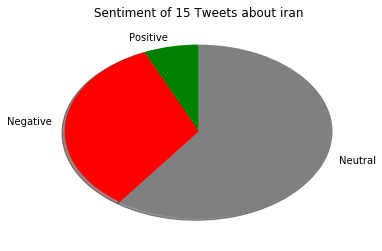

In [13]:
# second way of scraping with AYLIEN


import sys
import csv
import tweepy
import matplotlib.pyplot as plt

from collections import Counter
from aylienapiclient import textapi


if sys.version_info[0] < 3:
   input = raw_input

## Twitter credentials
consumer_key = 'fS8XQi8JmohDvSCEfnIxXeXvR'
consumer_secret = '9JMmMHmwR9LxILIQp1saWk0OLqe1Q9GvTh1ouwcDFBWf2axb8o'
access_token = '2433689125-R31DceVfSshRAGWUbQKpaHVadZ1xOrWMPUBD8BJ'
access_token_secret = 'wcj6ceEscjCjeaSLXA4xZFqaHzuFCZ8ZG1rctXhIPeiuC'

## AYLIEN credentials
application_id = "46b8ed19"
application_key = "889d1f80c80452bd56330a9a280d314b"

## set up an instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## set up an instance of the AYLIEN Text API
client = textapi.Client(application_id, application_key)

## search Twitter for something that interests you
query = input("What subject do you want to analyze for this example? \n")
number = input("How many Tweets do you want to analyze? \n")

results = api.search(
   lang="en",
   q=query + " -rt",
   count=number,
   result_type="recent" # or mixed or popular
)

print("--- Gathered Tweets \n")

## open a csv file to store the Tweets and their sentiment 
file_name = 'Sentiment_Analysis_of_{}_Tweets_About_{}.csv'.format(number, query)

with open(file_name, 'w', newline='') as csvfile:
   csv_writer = csv.DictWriter(
       f=csvfile,
       fieldnames=["Tweet", "Sentiment"]
   )
   csv_writer.writeheader()

   print("--- Opened a CSV file to store the results of your sentiment analysis... \n")

## tidy up the Tweets and send each to the AYLIEN Text API
   for c, result in enumerate(results, start=1):
       tweet = result.text
       tidy_tweet = tweet.strip().encode('ascii', 'ignore')

       if len(tweet) == 0:
           print('Empty Tweet')
           continue

       response = client.Sentiment({'text': tidy_tweet})
       csv_writer.writerow({
           'Tweet': response['text'],
           'Sentiment': response['polarity']
       })

       print("Analyzed Tweet {}".format(c))

## count the data in the Sentiment column of the CSV file 
with open(file_name, 'r') as data:
   counter = Counter()
   for row in csv.DictReader(data):
       counter[row['Sentiment']] += 1

   positive = counter['positive']
   negative = counter['negative']
   neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for "sizes"
colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

In [18]:
data.tail()

,Tweets,len,ID,Date,Source,Likes,RTs,SA
95,"RT @HeshmatAlavi: - Base in Al Ba’th, S #Syria...",144,995093901189922816,2018-05-12 00:10:48,TweetDeck,0,57,-1
96,RT @GregWest_HALOJM: The same people that beli...,140,995093900909006849,2018-05-12 00:10:48,Twitter for Android,0,33,0
97,"RT @RealMattCouch: Liberals: ""If Trump ends th...",140,995093898509733889,2018-05-12 00:10:48,Twitter Web Client,0,130,-1
98,RT @jkirchick: Two Obama administration offici...,140,995093898337947650,2018-05-12 00:10:47,Twitter Web Client,0,77,0
99,RT @5228027s: HEY IRAN BACK OFF ISRAEL OR SANC...,140,995093897520078850,2018-05-12 00:10:47,Twitter for Android,0,3,-1


In [24]:
file.SA

0     1
1     0
2    -1
3     0
4    -1
5     0
6     0
7     1
8     1
9     1
10   -1
11    1
12   -1
13    0
14    0
15    0
16    1
17   -1
18    0
19    0
20    0
21    0
22   -1
23    0
24    0
25    0
26    1
27    1
28    0
29    1
30    0
31    1
32    0
33    1
34   -1
35    1
36    1
37    0
38    0
39    0
40   -1
41   -1
42    1
43    1
44    1
45    1
46    0
47    1
48   -1
49    1
Name: SA, dtype: int32